## **📦 1. Install dependensi**

In [1]:
pip install tensorflow numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


## **🧾 2. Load File Split dan Kelas**

In [2]:
import os
import tensorflow as tf

DATASET_DIR = "food-101"
IMAGES_DIR = os.path.join(DATASET_DIR, "images")
META_DIR = os.path.join(DATASET_DIR, "meta")

# Load daftar kelas
with open(os.path.join(META_DIR, "classes.txt")) as f:
    class_names = [line.strip() for line in f.readlines()]
class_to_index = {name: idx for idx, name in enumerate(class_names)}

# Load daftar gambar untuk training dan testing
def load_split(split):
    with open(os.path.join(META_DIR, f"{split}.txt")) as f:
        lines = [line.strip() for line in f.readlines()]
    image_paths = [os.path.join(IMAGES_DIR, f"{line}.jpg") for line in lines]
    labels = [class_to_index[line.split("/")[0]] for line in lines]
    return image_paths, labels

train_paths, train_labels = load_split("train")
test_paths, test_labels = load_split("test")

## **🖼️ 3. Preprocessing dan Dataset Pipeline**

In [3]:
IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

def preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = image / 255.0
    return image, tf.one_hot(label, depth=len(class_names))

train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_ds = train_ds.map(preprocess, num_parallel_calls=AUTOTUNE)
train_ds = train_ds.shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))
test_ds = test_ds.map(preprocess, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)

## **🔧 4. Bangun dan Latih Model**

In [23]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
output = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_ds, epochs=50, validation_data=test_ds)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 166s 337ms/step - accuracy: 0.8101 - loss: 0.7656 - val_accuracy: 0.2872 - val_loss: 4.3154
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 160s 340ms/step - accuracy: 0.8463 - loss: 0.5966 - val_accuracy: 0.4126 - val_loss: 2.8551
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 160s 340ms/step - accuracy: 0.8855 - loss: 0.3902 - val_accuracy: 0.4800 - val_loss: 2.5128
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 159s 337ms/step - accuracy: 0.9099 - loss: 0.3043 - val_accuracy: 0.5206 - val_loss: 2.4829
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 157s 334ms/step - accuracy: 0.9168 - loss: 0.2502 - val_accuracy: 0.5278 - val_loss: 2.3849
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 159s 337ms/step - accuracy: 0.9262 - loss: 0.2341 - val_accuracy: 0.5408 - val_loss: 2.1860
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 158s 337ms/step - accuracy: 0.9422 - loss: 0.1880 - val_accuracy: 0.5286 - val_loss: 2.4904
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 159s 337ms/step - accuracy: 0.9438 -

## **📈 5. Langkah-langkah Evaluasi Model di JupyterLab**

####  Evaluasi model menggunakan confusion_matrix dari sklearn, classification_report untuk precision, recall, dan F1-score

######  Menambahkan evaluasi seperti Confusion Matrix, Classification Report, dan F1 Score akan sangat membantu dalam mengetahui kelas mana yang sulit dikenali dan seberapa baik model bekerja secara menyeluruh.

#### **🧾 1. Import Library Tambahan**

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **🗃️ 2. Prediksi pada Test Dataset**

In [25]:
# Ambil semua gambar dan label dari test_ds
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

###### Kita harus menggabungkan hasil prediksi dan label asli:

#### **📊 3. Tampilkan Confusion Matrix**

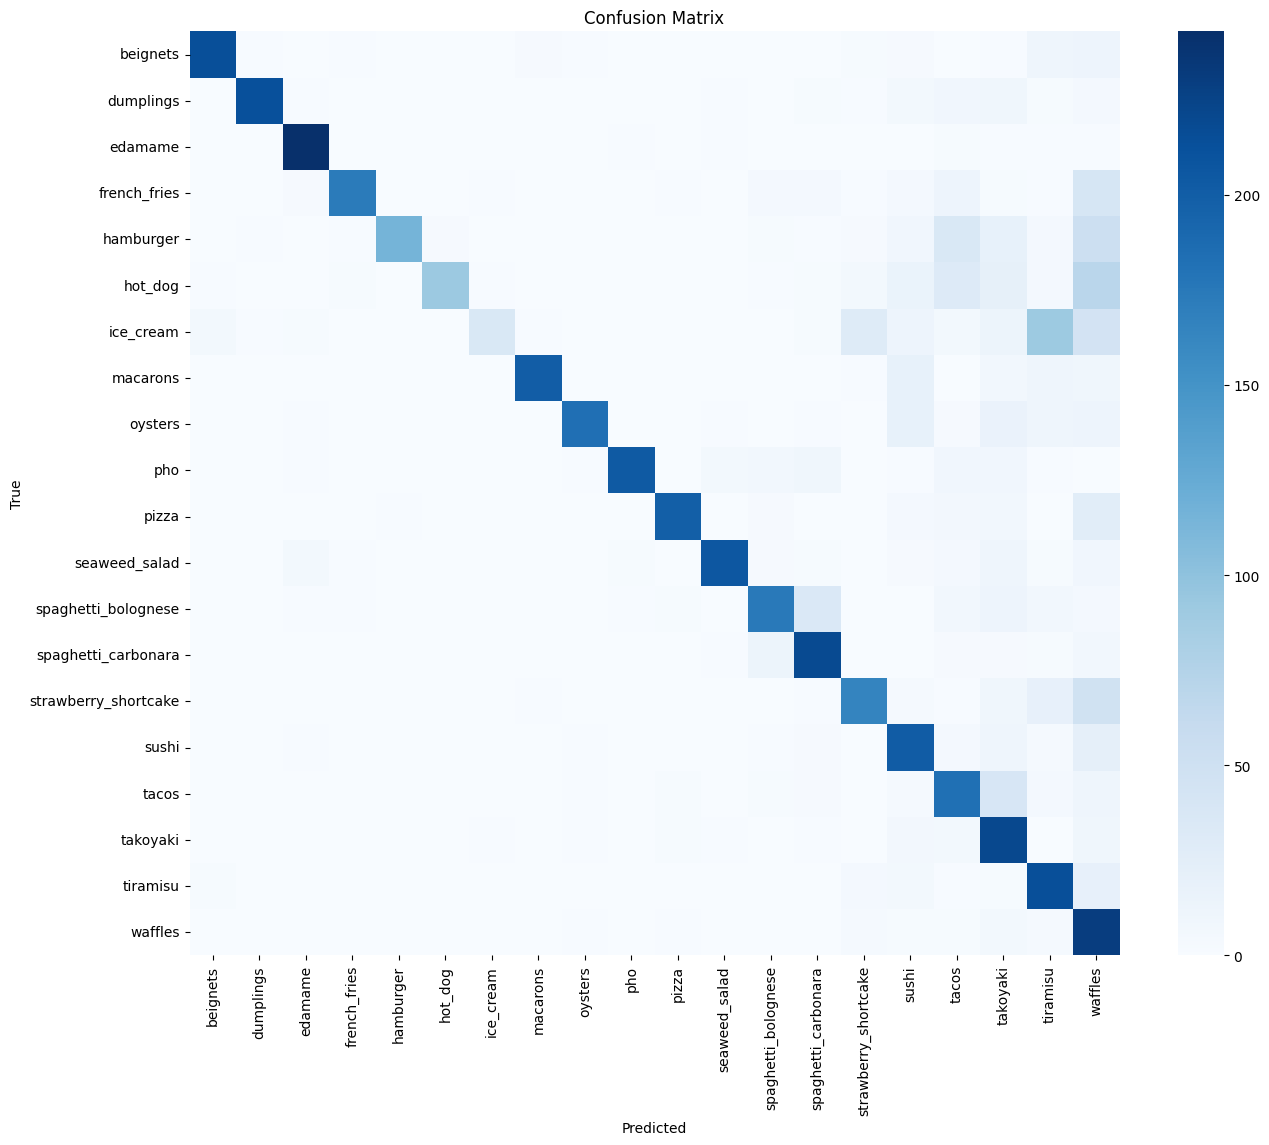

In [26]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(15, 12))
sns.heatmap(cm, xticklabels=class_names, yticklabels=class_names, 
            annot=False, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### **🧠 4. Tampilkan Classification Report**

In [27]:
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

                      precision    recall  f1-score   support

            beignets       0.96      0.86      0.90       250
           dumplings       0.99      0.85      0.91       250
             edamame       0.94      0.97      0.95       250
        french_fries       0.97      0.69      0.81       250
           hamburger       0.99      0.46      0.63       250
             hot_dog       0.97      0.37      0.54       250
           ice_cream       0.93      0.15      0.26       250
            macarons       0.98      0.80      0.88       250
             oysters       0.97      0.74      0.84       250
                 pho       0.98      0.82      0.89       250
               pizza       0.96      0.80      0.87       250
       seaweed_salad       0.95      0.82      0.88       250
 spaghetti_bolognese       0.82      0.70      0.75       250
 spaghetti_carbonara       0.76      0.88      0.81       250
strawberry_shortcake       0.75      0.66      0.70       250
       

#### **📦 5. (Opsional) Simpan Hasil Evaluasi ke File .txt**

In [28]:
with open("evaluation_report.txt", "w") as f:
    f.write(report)

## **💿 7. Visualisasi Akurasi dan Loss**

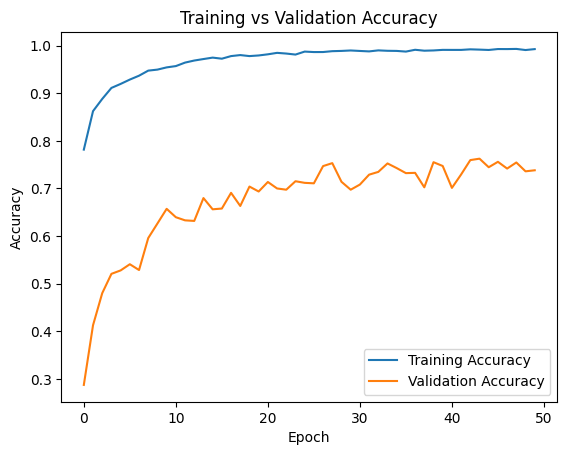

In [29]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

## **💾 8. Simpan Model**

In [ ]:
model.save("food101_model.h5")

#### Untuk konversi ke .tflite (untuk Flutter):

In [30]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("food101_model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ADVAN\AppData\Local\Temp\tmpa2o0puz6\assets


INFO:tensorflow:Assets written to: C:\Users\ADVAN\AppData\Local\Temp\tmpa2o0puz6\assets


Saved artifact at 'C:\Users\ADVAN\AppData\Local\Temp\tmpa2o0puz6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_314')
Output Type:
  TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)
Captures:
  2751226626112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2755379749184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2755379746896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2755379750240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2755379748128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2755379740736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2755379743024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2755379741792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2755379741616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2755288296688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

## **📄 9. Simpan Label ke File**

In [31]:
with open("labels.txt", "w") as f:
    for label in class_names:
        f.write(label + "\n")